Импортируем библиотеки, нам понадобится необходимый минимум:

In [722]:
import pandas as pd
from matplotlib import pyplot as plt
import textwrap

Выключим предупреждения от `pandas`, возникающие при работе с копиями столбцов при создании новых на основе старых:

In [723]:
pd.set_option('chained_assignment', None)

Загрузим данные из файла `Online Retail.csv` (https://disk.yandex.ru/i/feRYtlWHtOWAPw) и удалим строки с пропущенными значениями:

In [724]:
sales = pd.read_csv("Online Retail.csv")
sales.dropna(inplace = True)
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Переменные в файле (источник – [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/customersegmentation), данные по транзакциям покупателей, преимущественно оптовых, одного крупного сувернирного онлайн-маркета, зарегистрированного в Великобритании):
    
* `InvoiceNo`: номер транзакции;
* `StockCode`: код товара;
* `Description`: описание товара;
* `Quantity`: сколько единиц товара куплено;
* `InvoiceDate`: дата и время транзакции;
* `UnitPrice`: цена товара;
* `CustomerID`: ID покупателя;
* `Country`: страна проживания покупателя.

### Задача 1: подготовка данных 

Сформируйте таблицу частот `tab` для столбца `Country` в виде последовательности `pandas Series` и замените в ней название страны `EIRE` на `Ireland`.

Удалите запись с ключом `Unspecified`, так закодированы покупки, сделанные пользователями из стран без указанного названия. Удалите запись с ключом `United Kingdom` – компания зарегистрирована в этой стране, нас будут интересовать покупки пользователей из других стран.

Замените названия стран, которые встречаются в датафрейме реже, чем 100 раз, на название `Other`. Избавьтесь от дубликатов и объедините все строки с `Other` в одну категорию, просуммировав соответствующие частоты. При необходимости отсортируйте строки в `tab` по убыванию значений, это пригодится для последующей визуализации.

In [725]:
### YOUR CODE HERE ###

tab = sales['Country'].value_counts()
tab = tab.rename(index={'EIRE': 'Ireland'})
tab = tab.drop(index=['Unspecified', 'United Kingdom'], errors = 'ignore')


selection = tab < 100
other_sum = tab[selection].sum()
tab = tab[~selection]
tab['Other'] = other_sum
tab = tab.sort_values(ascending = False)

print(tab)

Country
Germany            9495
France             8491
Ireland            7485
Spain              2533
Netherlands        2371
Belgium            2069
Switzerland        1877
Portugal           1480
Australia          1259
Norway             1086
Italy               803
Channel Islands     758
Finland             695
Cyprus              622
Sweden              462
Austria             401
Denmark             389
Japan               358
Other               356
Poland              341
USA                 291
Israel              250
Singapore           229
Iceland             182
Canada              151
Greece              146
Malta               127
Name: count, dtype: int64


### Задача 2: строим столбиковую диаграмму для стран

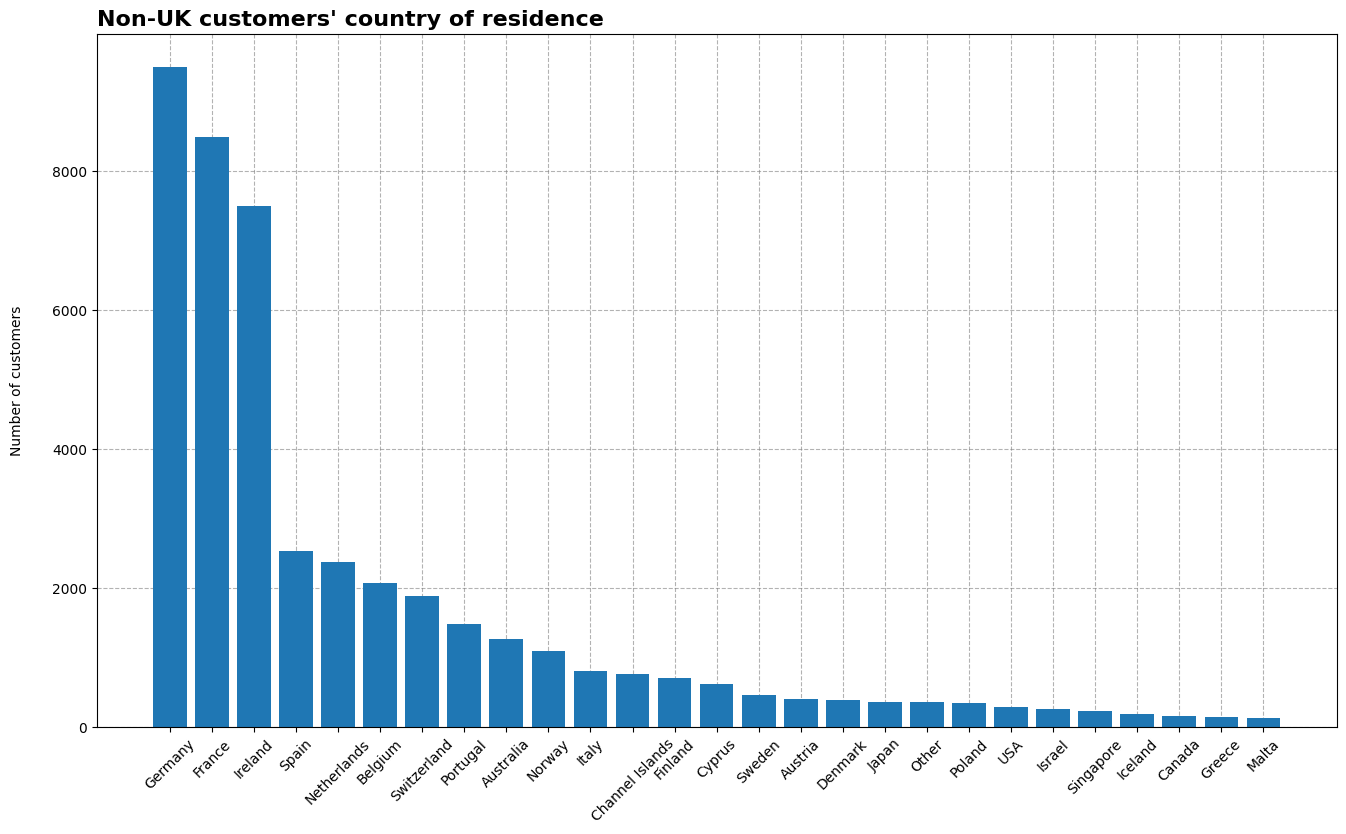

In [726]:
x = tab.index
y = tab.values

fig, ax = plt.subplots(figsize = (16, 9))

# сама диаграмма
ax.bar(x, y);

# заголовок
ax.set_title("Non-UK customers' country of residence", 
             loc = "left",
             fontsize = 16,
             fontweight = "bold");

# подписи по оси X
ax.tick_params(axis = 'x', 
               labelrotation = 45)

# подпись ко всей оси Y
ax.set_ylabel("Number of customers", 
              labelpad = 20);

# сетка
ax.grid(color = 'grey', 
        alpha = 0.6, 
        linestyle = 'dashed');

ax.set_axisbelow(True)

### Задача 3: подготовка данных 

Отберите строки исходного датафрейма, которые соответствуют покупкам пользователей из Германии (`Germany`) и сохраните их в датафрейм `grm`. Отберите из `grm` строки, которые соответствуют заказам, содержащим чашки или кружки (`MUG` в описании товара), и сохраните их в датафрейм `mugs`. 

Выберите топ-10 самых популярных кружек и по аналогии с задачей 1 сформируйте таблицу частот `mg`, где кружки с частотой менее 8 «схлопнуты» в категорию `OTHER`. Измените формат названий категорий – примените функцию, написанную ниже.

In [727]:
def get_clean(x):
    x = x.lower()
    x = x.replace("coffee mug", "mug").\
    replace("mug", "").replace("design", "")
    x = x.replace("  ", " ")
    x = x.strip().capitalize()
    return x

### YOUR CODE HERE ###

germany_selection = sales['Country'] == 'Germany'
grm = sales[germany_selection].copy()

mug_selection = grm['Description'].str.contains('MUG|mug|cup', case=False, na=False)
mugs = grm[mug_selection].copy()

mug_count = mugs['Description'].value_counts()
top_10 = mug_count.head(10)
other_count = mug_count[10:].sum()
mg = pd.concat([top_10, pd.Series({'OTHER': other_count})])
mg.index = mg.index.map(get_clean)

low_frequency_selection = mg < 8
mg = pd.concat([
    mg[~low_frequency_selection],
    pd.Series({'OTHER': mg[low_frequency_selection].sum()})
]).sort_values(ascending=False)

print("Топ кружек в Германии:")
print(mg)

Топ кружек в Германии:
Other                          143
Red retrospot cup               34
Apples                          30
Set/6 red spotty paper cups     24
Blue polkadot cup               22
Spaceboy childrens cup          21
Pears                           18
Pink polkadot cup               18
Children's spaceboy             15
Children's circus parade        15
Dolly girl childrens cup        12
OTHER                            0
dtype: int64


### Задача 4: строим круговую и кольцевую диаграмму

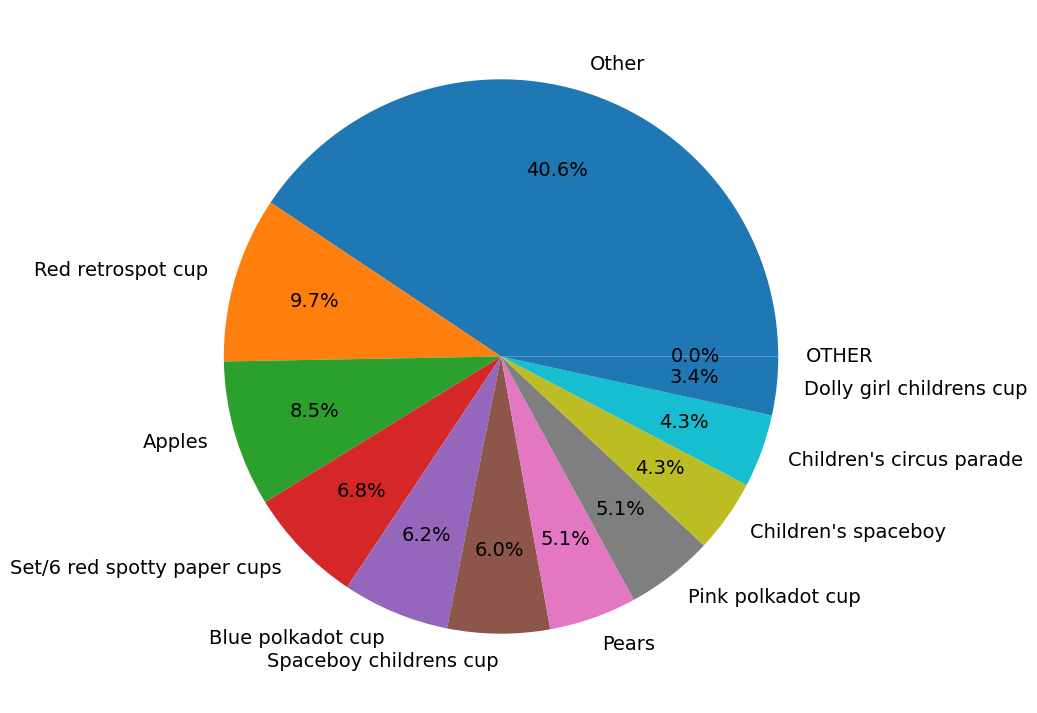

In [728]:
# ради всего святого, не стройте базовые круговые диаграммы, это катастрофа

labs = mg.index
vals = mg.values

fig, ax = plt.subplots(figsize = (16, 9))

ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.7,
       textprops = dict(fontsize = 14));

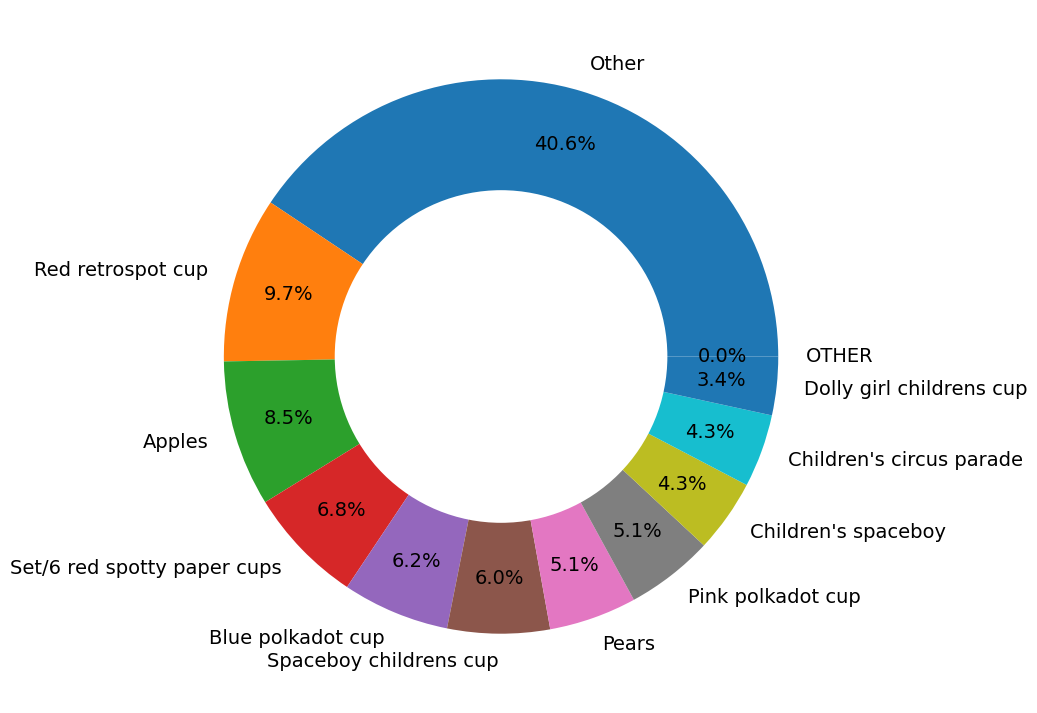

In [729]:
# переходим на кольцевую диаграмму (ring/donut diagram)

fig, ax = plt.subplots(figsize = (16, 9))

ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.8,
       textprops = dict(fontsize = 14));

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle);

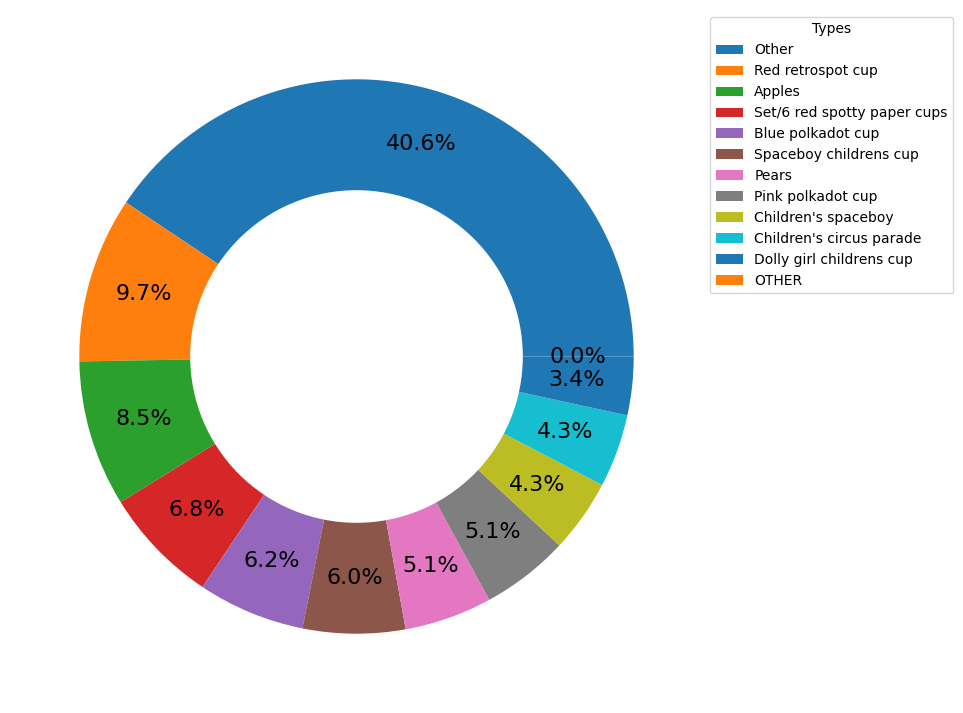

In [730]:
# выносим названия в легенду

fig, ax = plt.subplots(figsize = (16, 9))

# wedges – сектора, они же patches
# texts – подписи, они же labels
# autotexts – подписи с процентами

wedges, texts, autotexts = ax.pie(vals, 
                                  autopct = '%.1f%%',
                                  pctdistance = 0.8, 
                                  textprops = dict(fontsize = 16));

ax.legend(wedges, labs,
          title = "Types",
          loc = "upper left",
          bbox_to_anchor = (1, 0, 0.5, 1))

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

fig.gca().add_artist(centre_circle);

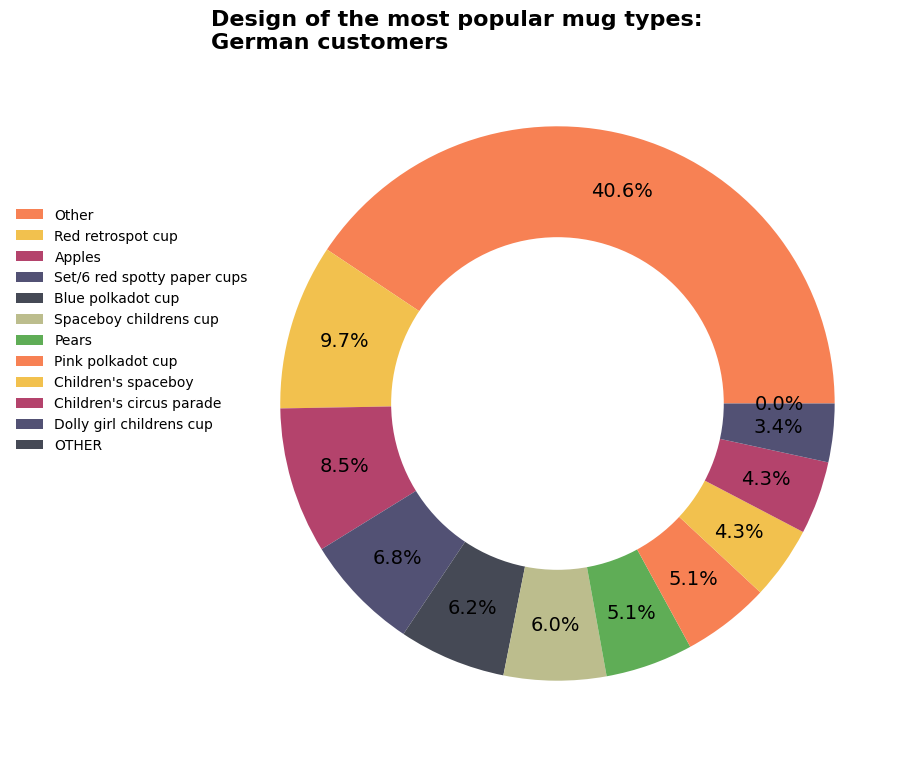

In [731]:
# добавляем свои цвета, исправляем легенду
# палитры https://coolors.co/

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9))

wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# выключаем рамку у легенды, двигаем ее

ax.legend(wedges, labs,
          loc = "upper left",
          bbox_to_anchor = (-0.3, 0.8),
          frameon = False);

# добавляем заголовок графика
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

In [732]:
# изучаем составные части,
# чтобы позволить себе более тонкие настройки

print(wedges, end = "\n\n")
print(texts, end = "\n\n")
print(autotexts, end = "\n\n")

for wedge in wedges:
    print(wedge.get_facecolor())
    print([int(i * 255) for i in wedge.get_facecolor()[0:-1]])

[<matplotlib.patches.Wedge object at 0x000001B7E0EBAF90>, <matplotlib.patches.Wedge object at 0x000001B7E94F5520>, <matplotlib.patches.Wedge object at 0x000001B7B1EA94F0>, <matplotlib.patches.Wedge object at 0x000001B7B2A775C0>, <matplotlib.patches.Wedge object at 0x000001B7B5E5E360>, <matplotlib.patches.Wedge object at 0x000001B7EBFA1790>, <matplotlib.patches.Wedge object at 0x000001B7E15B32C0>, <matplotlib.patches.Wedge object at 0x000001B7D8674DA0>, <matplotlib.patches.Wedge object at 0x000001B7B5EB4DD0>, <matplotlib.patches.Wedge object at 0x000001B7D874BE30>, <matplotlib.patches.Wedge object at 0x000001B7B59564B0>, <matplotlib.patches.Wedge object at 0x000001B7B2A1BA40>]

[Text(0.3193130997523306, 1.0526343830250646, ''), Text(-1.0554422553036238, 0.30990586590060004, ''), Text(-1.0554423488925433, -0.3099055471658924, ''), Text(-0.7915772097746343, -0.7638098722623352, ''), Text(-0.4209519260239982, -1.0162674234554046, ''), Text(-0.00981731374795795, -1.0999561901961252, ''), Te

In [733]:
print([atext.get_color() for atext in autotexts])

# создаем свой список цветов для подписей с процентами (white, black)
# изменяем атрибут color внутри каждого элемента в autotexts

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
print([atext.get_color() for atext in autotexts])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
['k', 'k', 'w', 'w', 'w', 'k', 'k', 'black', 'black', 'black', 'black', 'black']


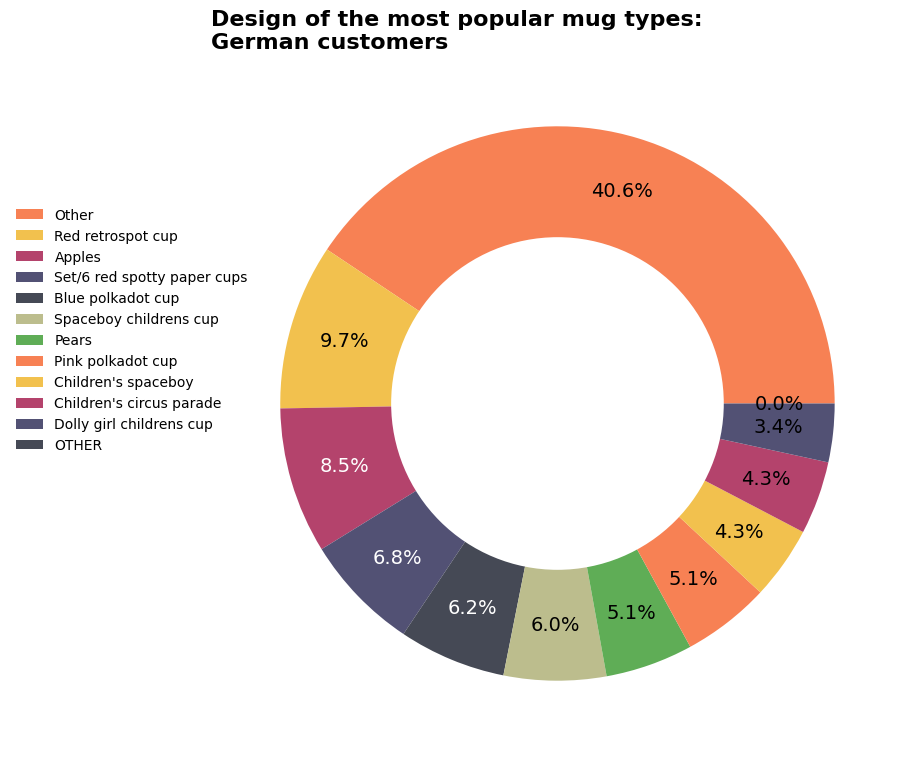

In [734]:
cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9))

wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# добавляем фрагмент с изменением цвета текста сюда
# после определения autotexts

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)

ax.legend(wedges, labs,
          loc = "upper left",
          bbox_to_anchor = (-0.3, 0.8),
          frameon = False);

ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

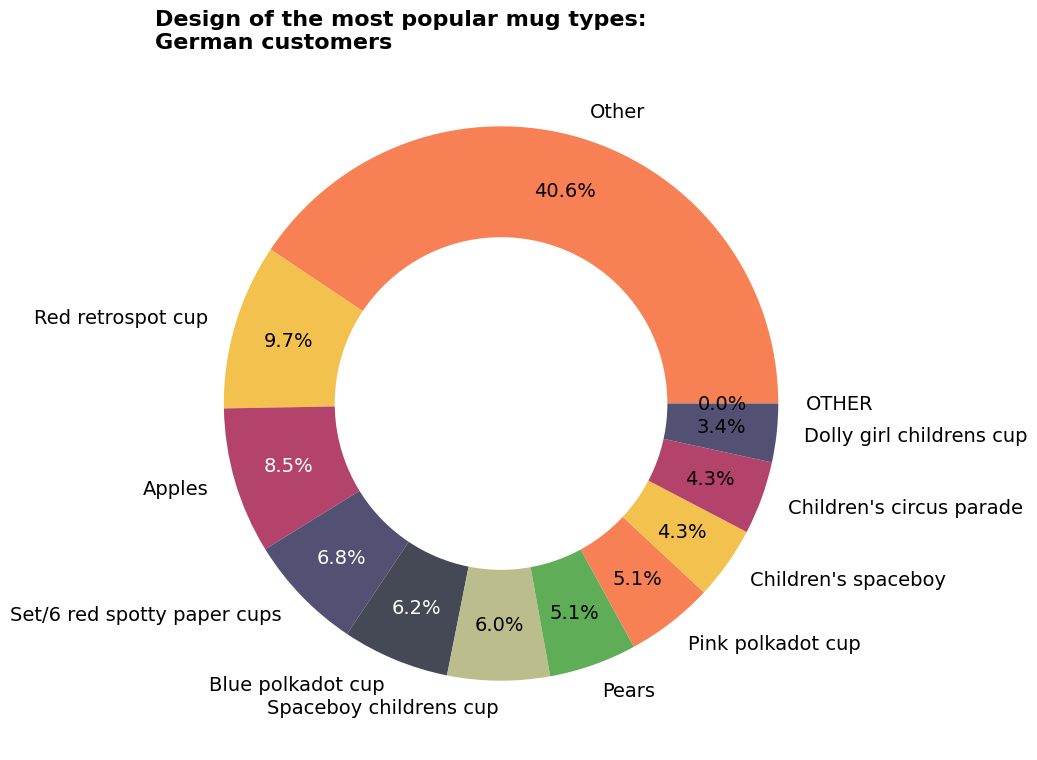

In [735]:
# попробуем убрать легенду

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9))

wedges, texts, autotexts = ax.pie(vals,
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

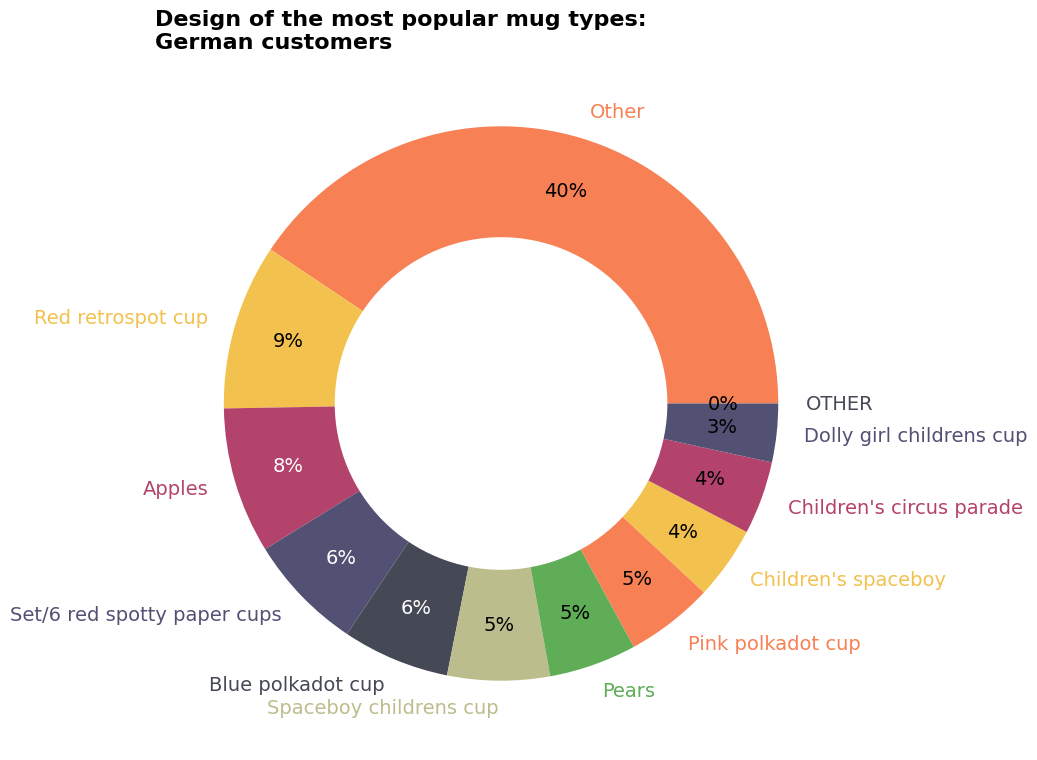

In [736]:
# завершающий этап: делаем цвета подписей такими же, 
# как и у секторов, и без легенды хорошо

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9))

wedges, texts, autotexts = ax.pie(vals,
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%i%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# прошлый фрагмент кода для цвета процентов

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
# новый фрагмент кода для согласования цветов
# забираем цвет сектора через get_facecolor()
# выставляем его в подписях через set_color()

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())
    
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

# хватит развлекаться, сохраняем и идём дальше

fig.savefig("ring.png")

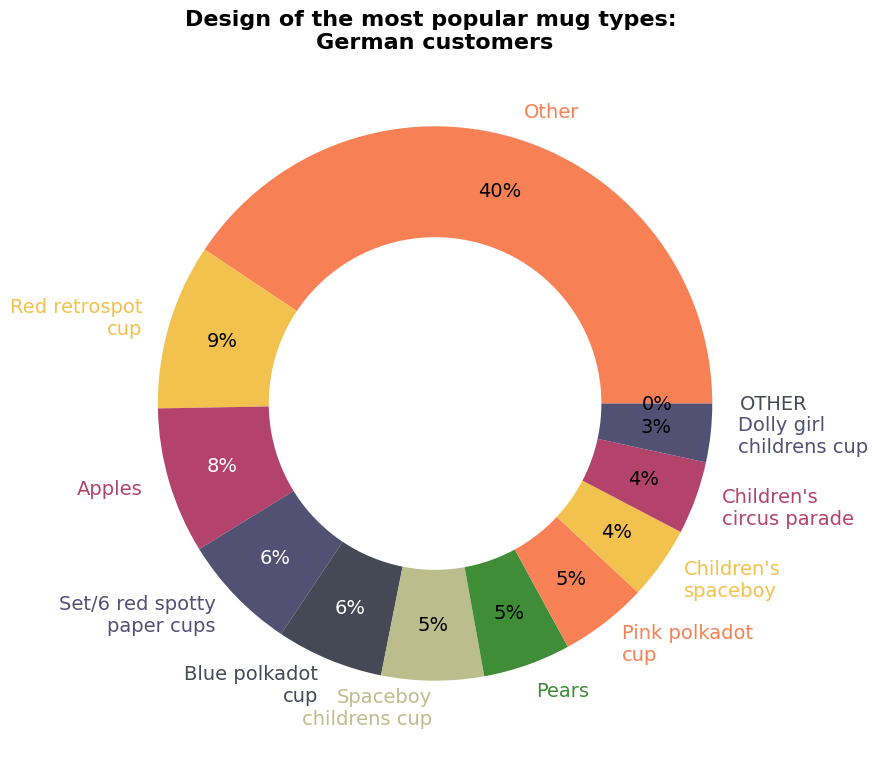

In [ ]:
### TO DO LIST ###

# выбрать более темные цвета для Pears и Cake
# разбить длинные подписи на две строки
# подвинуть заголовок

# ВСМЫСЛИ КЕЙК? Какой такой Cake? Я не вижу никакого кейка. The cake is a lie. И вообще это точно задание?
# ну и dpi выставлен слишком огромный (пощадите мою видеокарту)

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#3F8D36"]

fig, ax = plt.subplots(figsize = (16, 9))

wedges, texts, autotexts = ax.pie(vals,
                                  labels = [textwrap.fill(label, width=16) for label in labs],
                                  colors = cols,
                                  autopct = "%i%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14))

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())
    
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "center", 
            fontweight = "bold")

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle)

fig.savefig("ring.png")

### Задача 5: подготовка данных

Добавьте в исходный датафрейм столбец `Month` с номером месяца, извлечённым из даты покупки. Сформируйте таблицу частот `sales_time`, которая показывает, сколько в сумме было куплено товаров за каждый месяц. Упорядочьте месяцы в хронологическом порядке.

In [738]:
### YOUR CODE HERE ###

sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])
sales['Month'] = sales['InvoiceDate'].dt.month
sales_time = sales.groupby('Month')['Quantity'].sum().sort_index()

print(sales_time)

Month
1     269379
2     262833
3     344012
4     278585
5     367852
6     356922
7     363418
8     386612
9     537496
10    569666
11    669915
12    500198
Name: Quantity, dtype: int64


### Задача 6: строим линейный график для динамики

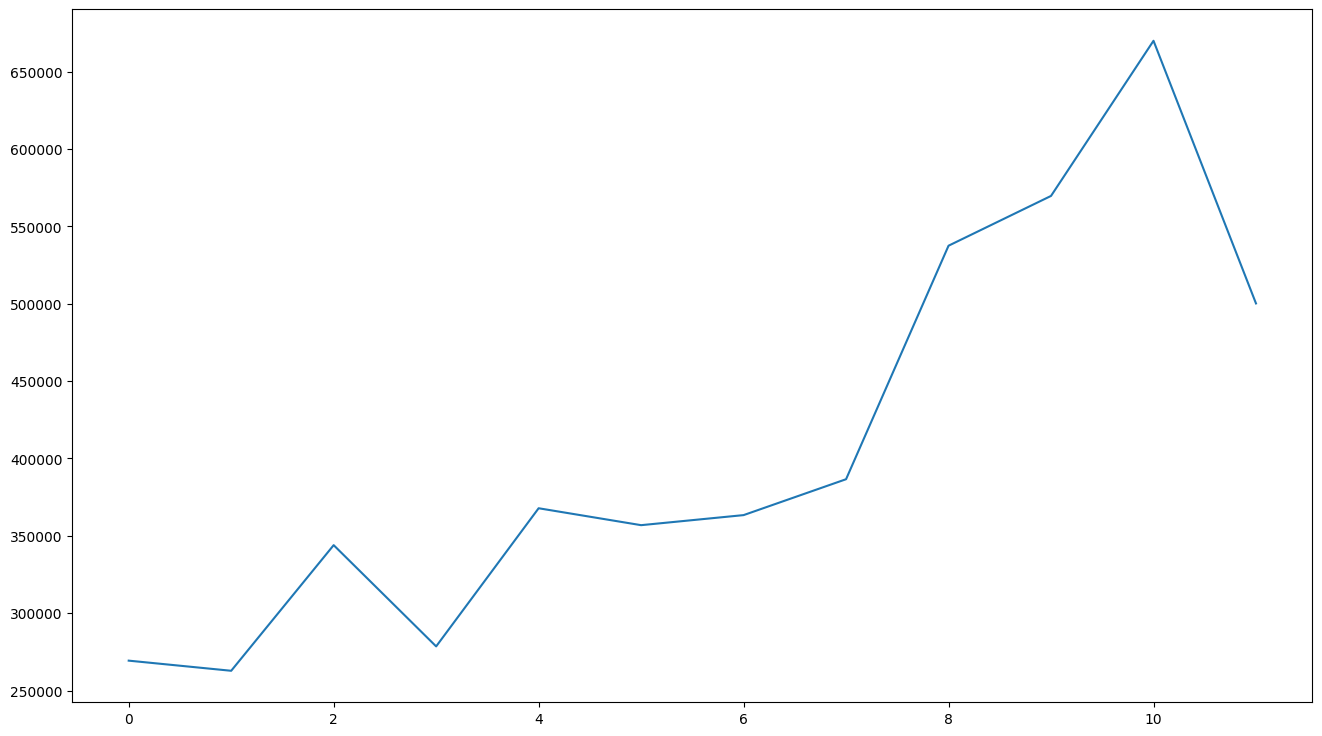

In [739]:
# простой график

x_ = range(0, 12)
y_ = sales_time.values

fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(x_, y_);

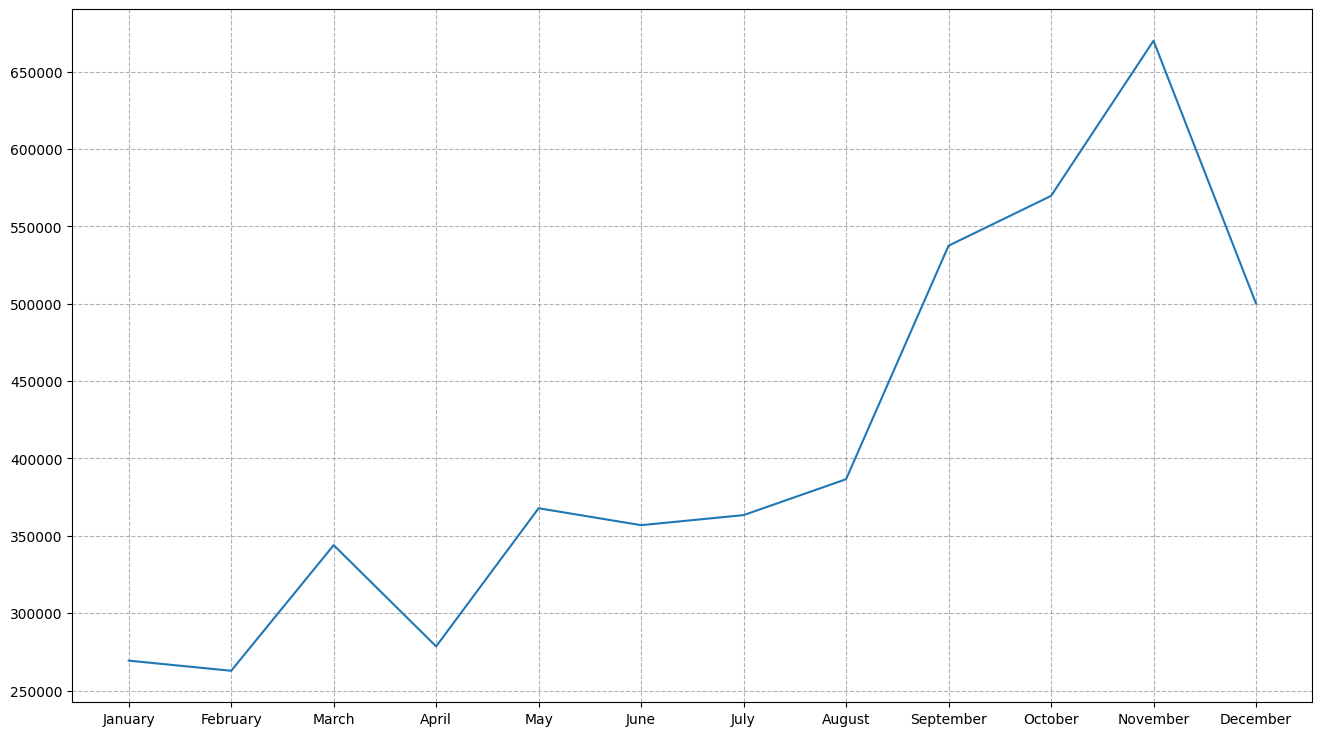

In [740]:
# корректируем оси

x_ = range(0, 12)
y_ = sales_time.values
months = ["January", "February",  "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(x_, y_);

# фиксируем засечки по оси x – xticks
# фиксируем подписи к засечкам – xticklabels

ax.set_xticks(x_)
ax.set_xticklabels(months);

# сетка
ax.grid(color = 'grey', alpha = 0.6, linestyle = 'dashed');
ax.set_axisbelow(True)

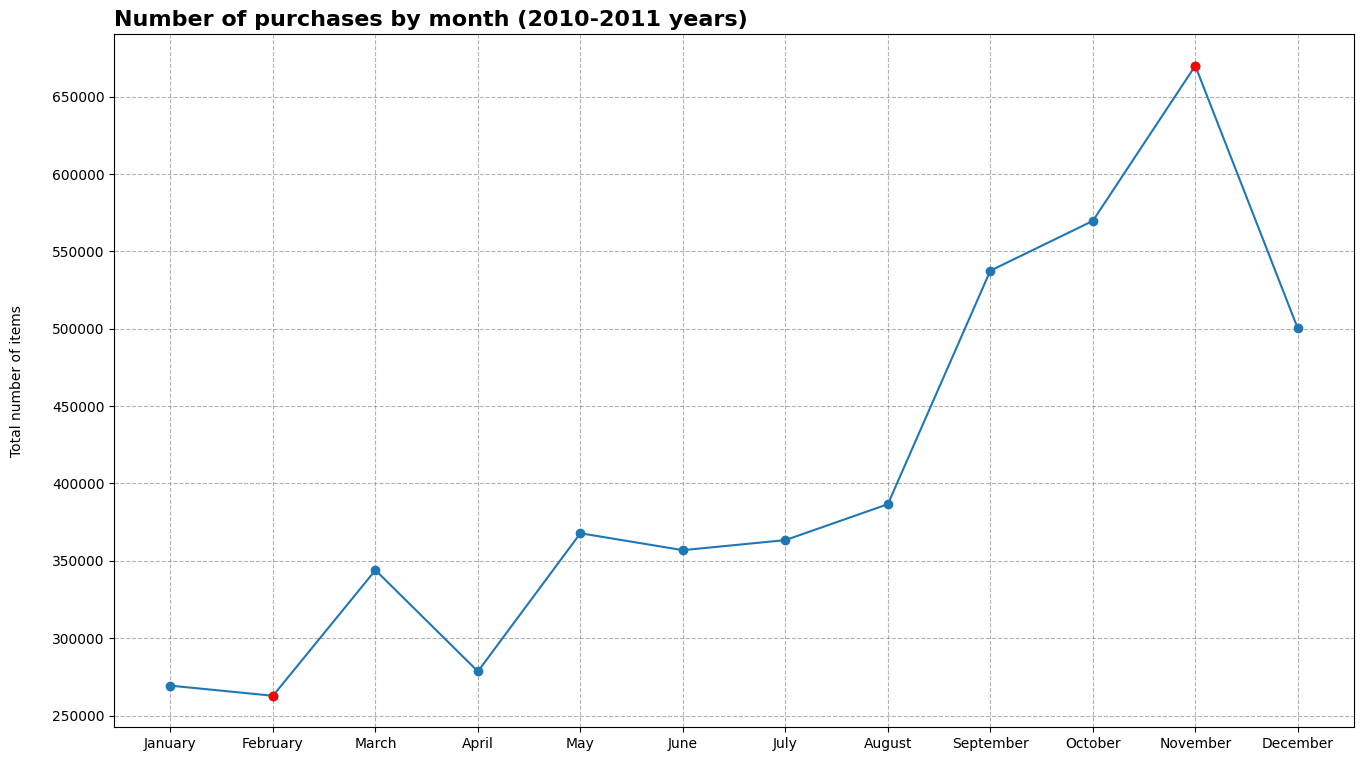

In [741]:
# отмечаем минимум и максимум

x_ = range(0, 12)
y_ = sales_time.values
months = ["January", "February",  "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(figsize = (16, 9))

# добавляем точки на линию
ax.plot(x_, y_, "-o");

ax.set_xticks(x_)
ax.set_xticklabels(months);

ax.grid(color = 'grey', alpha = 0.6, linestyle = 'dashed');
ax.set_axisbelow(True)

# точки с минимумом и максимумом

y_min, y_max = y_.min(), y_.max()
x_min, x_max = y_.argmin(), y_.argmax()

# еще одни точки поверх, но другого цвета

ax.plot([x_min, x_max], 
           [y_min, y_max], "ro");

# добавляем подписи

ax.set_title("Number of purchases by month (2010-2011 years)",
            loc = "left", 
            fontweight = "bold",
            fontsize = 16);

ax.set_ylabel("Total number of items", labelpad = 20);

### Задача 7: подготовка данных

Добавьте в исходный датафрейм столбец `TotalCost` с общей суммой покупки (без группировки по пользователям, просто произведение количества единиц товара и его цены). Отберите строки, которые соответствуют покупателям из стран в списке `chosen`.  

Сгруппируйте итоговый датафрейм по ID покупателя и сформируйте датафрейм, где по строкам – уникальные ID покупателей, а по столбцам – суммарные траты пользователя и страна, где он проживает. Сохраните результат в переменную `fin`.

In [742]:
chosen = ["Germany", "France", "Spain", "Italy"]

### YOUR CODE HERE ###

sales['TotalCost'] = sales['Quantity'] * sales['UnitPrice']

filtered_sales = sales[sales['Country'].isin(chosen)]

fin = filtered_sales.groupby('CustomerID').agg({
    'TotalCost': 'sum',
    'Country': 'first'
}).reset_index()

print(fin.head())

   CustomerID  TotalCost Country
0     12349.0    1757.55   Italy
1     12354.0    1079.40   Spain
2     12413.0     694.15  France
3     12417.0     436.30   Spain
4     12421.0     806.27   Spain


### Задача 8: строим гистограммы по группам

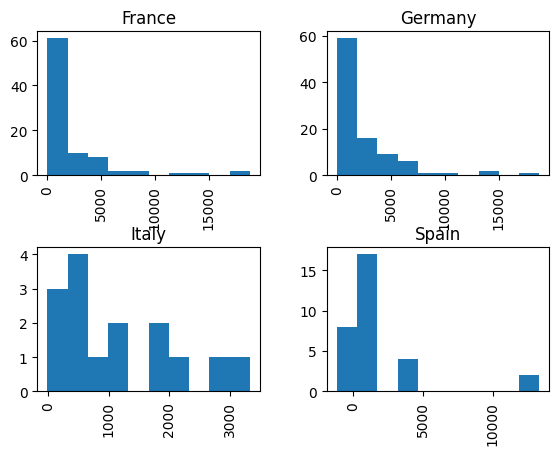

In [743]:
# без особых настроек

fin.hist("TotalCost", by = "Country", bins = 10);

In [744]:
# разбираемся с группировкой

grouped = fin.groupby("Country")
print(grouped.groups.keys())
print(grouped.get_group("France").head())

dict_keys(['France', 'Germany', 'Italy', 'Spain'])
    CustomerID  TotalCost Country
2      12413.0     694.15  France
7      12437.0    4896.66  France
8      12441.0     173.55  France
28     12488.0    1298.66  France
29     12489.0     334.93  France


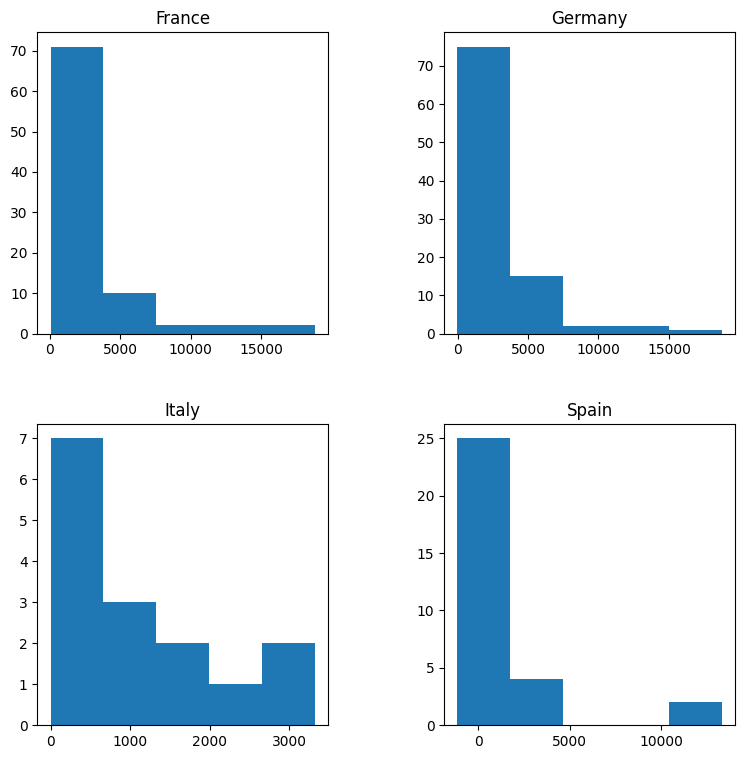

In [745]:
# используем группировку для отрисовки гистограмм

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9),
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

targets = zip(grouped.groups.keys(), axs.flatten())

for key, ax in targets:
    
    data = grouped.get_group(key)["TotalCost"]
    
    ax.hist(data, bins = 5)
    ax.set_title('%s' %key)

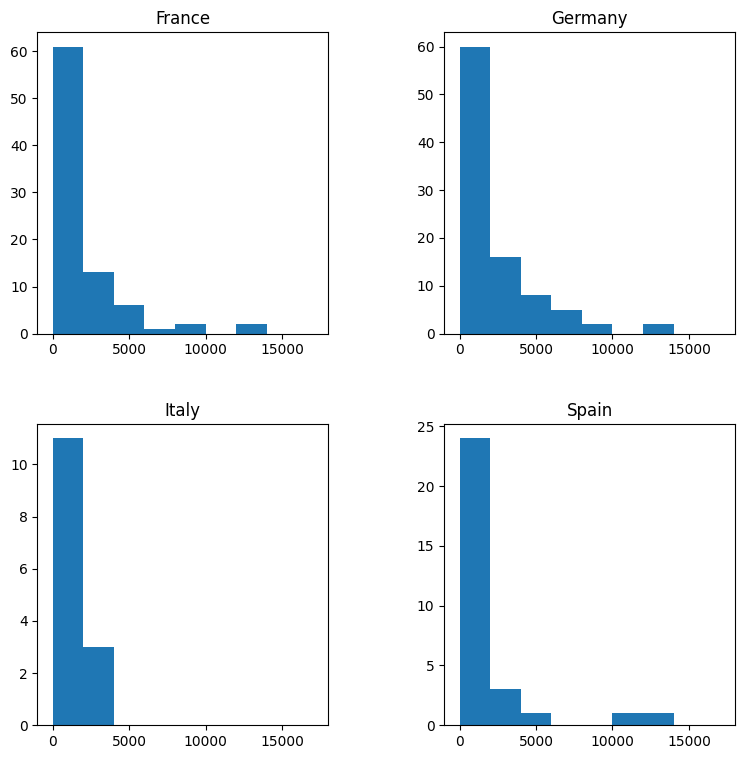

In [746]:
# унифицируем шаг гистограммы и оси

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9),
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

targets = zip(grouped.groups.keys(), axs.flatten())

for key, ax in targets:
    
    data = grouped.get_group(key)["TotalCost"]
    
    ax.hist(data, bins = range(0, 18000, 2000))
    ax.set_title('%s' %key)
    ax.set_xlim(-1000, 18000)

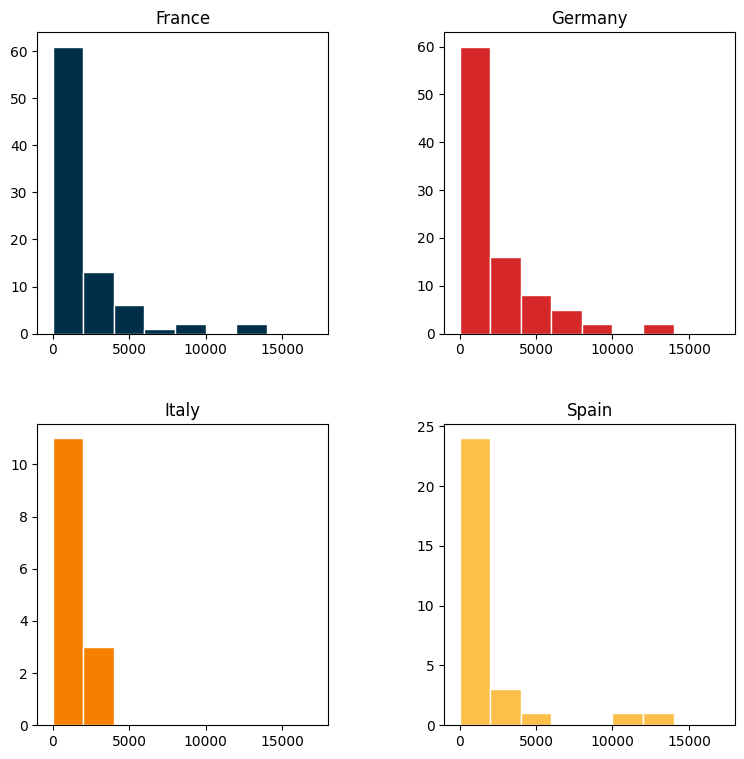

In [ ]:
# меняем цвета – расширяем перечень в zip()
# для остальных настроек – похожая история

# унифицируем шаг гистограммы и оси

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9),
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

fill = ["#003049", "#D62828", "#F77F00", "#FCBF49"]

targets = zip(grouped.groups.keys(), axs.flatten(), fill)

for key, ax, col in targets:
    
    data = grouped.get_group(key)["TotalCost"]
    
    ax.hist(data, bins = range(0, 18000, 2000), 
            color = col, edgecolor = "white")
    ax.set_title('%s' %key)
    ax.set_xlim(-1000, 18000)